#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **   _ M1- TP1 Apprentissage Automatique et Numérique_** </span>

# <span style="color:green; font-family:Georgia; font-size:1.5em;">1. Introduction

<span style="color:black; font-family:Georgia; font-size:1.3em;">Les objectifs de ce premier TP sont :</span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Exploration et Visualisation de données avec la bibliothèque __Pandas__</span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Implémentation d'une régression Linéaire Multiple avec la méthode de __moindres carrés__</span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire : </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Formule : $ y=\sum_{i=1}^N w_i x_i + b  $  </span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire Simple : </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> $ N = 1 $ donc $ y= \beta_1 x_1 + \beta_0  $ </span>



# <span style="color:green; font-family:Georgia; font-size:1.5em;">2. Jeux de données 

<span style="font-family:Georgia; font-size:1.2em;">House Pricing is dataset describing the sale of individual residential property from 2006 to 2010. It contains a large number of explanatory variables involved in assessing home values. This data set gives you the opportunity to display the skills they had learned within the class.</span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will use the _House Pricing_ dataset for a regression project with a <span style="color:red">simple linear regression </span> </span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will implement the  <span style="color:red"> Least Squares Method </span> to learn a prediction  model for the _House Pricing_ dataset</span>





# <span style="color:green; font-family:Georgia; font-size:1.5em;">3. Exploration  et Visualisation de données </span>
## <span style="color:brown; font-family:Gemesorgia; font-size:1.3em;">3.1 Objectifs </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Importation de la base de données avec pandas </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Calcul de la correlation entre les variables explicatives et la variable expliquée _SalePrice_  </span>
3. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Choisir la variable explicative (exogène) </span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <span style="color:brown; font-family:times; font-size:1.3em;">3.2 Load the training and testing data </span> 

In [2]:
houses_train = pd.read_csv('train.csv')
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses_test= pd.read_csv('test.csv')
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1200,20,RL,75.0,11235,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,148000
1,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml,116050
2,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,197900
3,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,117000
4,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,213000


In [4]:
houses_train.get_dtype_counts()
houses_train.describe()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1199.000000,1199.000000,989.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1193.000000,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,600.000000,57.105922,70.081901,10558.848207,6.106756,5.568807,1971.357798,1984.992494,104.006706,444.801501,...,95.216013,45.986656,22.196831,3.656380,14.993328,1.910759,40.487073,6.308590,2007.812344,181442.497081
std,346.265794,42.686374,23.713505,10623.548705,1.382678,1.120485,30.059978,20.535058,183.605510,440.161545,...,124.055413,65.696803,61.529650,30.003428,54.789200,33.162113,482.523289,2.672094,1.318539,81098.986765
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,300.500000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,600.000000,50.000000,70.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,899.500000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,167.000000,712.500000,...,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1199.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


## <span style="color:brown; font-family:times; font-size:1.3em;">3.3 Variables Correlation with SalePrice </span>
<span style="color:black; font-family:Georgia; font-size:1.3em;">In this section we will search for the two most correlated variables.</span>


In [5]:
# Todo
# calculate the correlation between salePrice and all variables
# Keep the two most correlated variables to test them with the simple linear regression

columns = list(houses_train)
correl = []

correl = abs(houses_train.cov().SalePrice/np.sqrt(houses_train.var().SalePrice * houses_train.var()))

correl = correl.sort_values(ascending=[False])
correl = correl[1:3].to_dict()
print(correl)


{'OverallQual': 0.7894380947520545, 'GrLivArea': 0.7403659162364659}


## <span style="color:brown; font-family:times; font-size:1.3em;">3.4 Plot SalePrice    </span> 

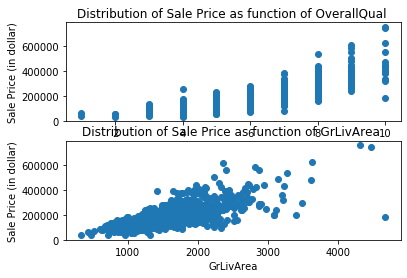

In [6]:
# Todo
# plot the SalePrices as function of your 2 variables (most correlated)
# add x label and Y label, the values and the scatter

plt.subplot(2,1,1)
plt.scatter(houses_train[list(correl)[0]], houses_train.SalePrice)
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price (in dollar)");

plt.subplot(2,1,2)
plt.scatter(houses_train[list(correl)[1]], houses_train.SalePrice)
plt.title("Distribution of Sale Price as function of GrLivArea ")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price (in dollar)");

# <span style="color:green; font-family:Georgia; font-size:1.5em;">4. Regression Lineaire Simple (Python) </span>


In [17]:
houses_train[list(correl)[0]]

0       7
1       6
2       7
3       7
4       8
       ..
1194    6
1195    6
1196    7
1197    7
1198    7
Name: OverallQual, Length: 1199, dtype: int64

In [33]:
# Todo 

# Estimation de \beta_1

# 

def Beta1(Y,X):
    return X.cov(Y)/X.var()

reg1B1 = Beta1(houses_train.SalePrice, houses_train[list(correl)[0]])
reg2B1 = Beta1(houses_train.SalePrice, houses_train[list(correl)[1]])

print("B1 reg1 = ",reg1B1 )
print("B1 reg2 = ",reg2B1 )

B1 reg1 =  46303.3470808911
B1 reg2 =  116.00632465557472


In [55]:
# Todo 
# Estimation de \beta_0
    
def Beta0(B1, Y, X):
    return np.mean(Y)-B1*np.mean(X)

reg1B0 = Beta0(reg1B1,houses_train.SalePrice, houses_train[list(correl)[0]])
reg2B0 = Beta0(reg2B1,houses_train.SalePrice, houses_train[list(correl)[1]])

print("B0 reg1 = ",reg1B0 )
print("B0 reg2 = ",reg2B0 )


B0 reg1 =  -101320.7283788863
B0 reg2 =  6379.277919203509


In [58]:
# Calculez le coeffecient de détermination R2 
def Yc(B1, B0, X):
    return B1*X+B0

reg1Yc =  Yc(reg1B1, reg1B0, houses_train[list(correl)[0]])
reg2Yc =  Yc(reg2B1, reg2B0, houses_train[list(correl)[1]])

print("Yc reg1 = ",reg1Yc )
print("Yc reg2 = ",reg2Yc )



def R2(B1, B0, Y, Yc):
    return sum((Yc-np.mean(Y))**2)/sum((Y-np.mean(Y))**2)

reg1R2 = R2(reg1B1, reg1B0, houses_train.SalePrice,reg1Yc)
reg2R2 = R2(reg2B1, reg2B0, houses_train.SalePrice,reg2Yc)

print("R2 reg1 = ",reg1R2 )
print("R2 reg2 = ",reg2R2 )

if max(reg1R2,reg2R2)== reg1R2:
    pForte = houses_train[list(correl)[0]]
    B1 ,B0 = reg1B1, reg1B0
    namePForte = list(correl)[0]
    
else:
    pForte =houses_train[list(correl)[1]]
    B1 ,B0 = reg2B1, reg2B0
    namePForte = list(correl)[1]



Yc reg1 =  0       222802.701187
1       176499.354106
2       222802.701187
3       222802.701187
4       269106.048268
            ...      
1194    176499.354106
1195    176499.354106
1196    222802.701187
1197    222802.701187
1198    222802.701187
Name: OverallQual, Length: 1199, dtype: float64
Yc reg2 =  0       204750.093080
1       152779.259635
2       213566.573754
3       205562.137353
4       261361.179512
            ...      
1194    163219.828854
1195    175284.486618
1196    222499.060753
1197    202429.966587
1198    146978.943402
Name: GrLivArea, Length: 1199, dtype: float64
R2 reg1 =  0.6232125054457567
R2 reg2 =  0.5481416899246614


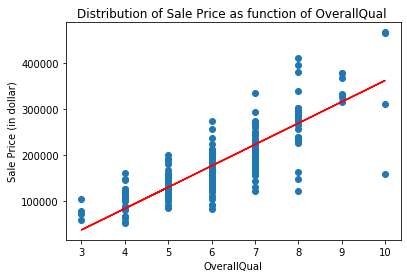

In [63]:
# prédire les valeurs sur les données de Test
X = houses_test[namePForte]

pred = B1 * X + B0

plt.scatter(X, houses_test.SalePrice)
plt.plot(X, pred, color = 'red')
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel(namePForte)
plt.ylabel("Sale Price (in dollar)");


# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Evaluation du  modèle (RMSE)
  </span>


<span style="font-family:Georgia; font-size:1.2em;">La  racine  carrée  de l’erreur quadratique moyenne (RMSE) est une   autre  mesure  des  erreurs  de  prévision. La RMSE est définie par : $ RMSE = \sqrt{ \frac{1}{n} \sum (pred - y)^{2}} $.
</span>

<span style="font-family:Georgia; font-size:1.2em;">
Cette  mesure  pénalise  d'avantage  les  erreurs  importantes 
</span>

In [71]:
# Calculez la RMSE de votre modèle sur les données de test
def RMSE(pred, Y, n):
    return np.sqrt((1/n)*sum((pred-Y)**2))

RMSEpred = RMSE(pred, houses_test.SalePrice,pred.size)

print('RMSE : ', RMSEpred)





RMSE :  42897.37104035708


# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Pour aller plus loin </span>

<span style="font-family:Georgia; font-size:1.2em;">  
La standardisation des données consiste à centrer-réduire la matrice de fonctions caractéristiques  $X$ en retranchant pour chaque vecteur $X^{j}, j \in [1, N]$ sa moyenne et en divisant par son écart-type.
</span>


<span style="font-family:Georgia; font-size:1.2em;">
La formule d’usage est alors : $ ~~~~~~~~~~~  \forall j \in [1, N] ~~~~ X^{j} = \frac{X^{j}_{std} - \mu_{j}}{ \sigma^{2}_{j}}$

</span>


======Estimation Beta1=======

	B1 reg1 =  64022.62959794873

	B1 reg2 =  60042.925641991635

======Estimation Beta0======

	B0 reg1 =  181442.49708090076

	B0 reg2 =  181442.49708090076

======Estimation ^y /valeurs etimées/======

Yc reg1 =
 0       222802.701187
1       176499.354106
2       222802.701187
3       222802.701187
4       269106.048268
            ...      
1194    176499.354106
1195    176499.354106
1196    222802.701187
1197    222802.701187
1198    222802.701187
Name: OverallQual, Length: 1199, dtype: float64

Yc reg2 =
 0       204750.093080
1       152779.259635
2       213566.573754
3       205562.137353
4       261361.179512
            ...      
1194    163219.828854
1195    175284.486618
1196    222499.060753
1197    202429.966587
1198    146978.943402
Name: GrLivArea, Length: 1199, dtype: float64

======Estimation R2======

	R2 reg1 =  0.6232125054457565

	R2 reg2 =  0.5481416899246612

======Estimation RSME======

	RMSE :  42956.99691876396

======Affichage 

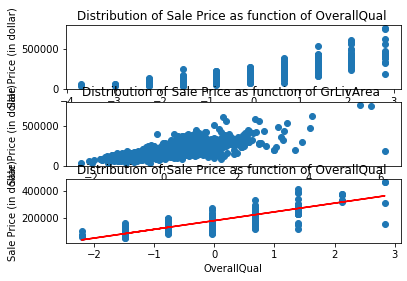

In [88]:
# Todo :
##  refaire le calcul des paramètres après un prétraitement sur les données d'apprentissage
##  1.  Centrer la variable --> soustraire son espérance à chacune de ses valeurs initiales
##  2.  Réduire la variable --> diviser toutes ses valeurs par son écart type.
## --------------------------
##    Soient  μ  l’espérance et σ l’écart-type des valeurs d’une variable aléatoire.
##    Centrer-réduire l’une de ses valeurs V revient alors à calculer : 
##          (V - μ ) / σ 
## --------------------------
##  3. re-éstimer les paramètre de modèle 
##  4. re-calculer la précision du modèle sur les données de test.

#Centrer-reduire les valeurs
houses_train[list(correl)[0]] = (houses_train[list(correl)[0]] - np.mean(houses_train[list(correl)[0]]) )/ houses_train[list(correl)[0]].std() 
houses_train[list(correl)[1]] = (houses_train[list(correl)[1]] - np.mean(houses_train[list(correl)[1]]) )/ houses_train[list(correl)[1]].std() 

#Estimation Beta1
reg1B1 = Beta1(houses_train.SalePrice, houses_train[list(correl)[0]])
reg2B1 = Beta1(houses_train.SalePrice, houses_train[list(correl)[1]])

print("\n======Estimation Beta1=======")
print("\n\tB1 reg1 = ",reg1B1 )
print("\n\tB1 reg2 = ",reg2B1 )

#Estimation Beta0
reg1B0 = Beta0(reg1B1,houses_train.SalePrice, houses_train[list(correl)[0]])
reg2B0 = Beta0(reg2B1,houses_train.SalePrice, houses_train[list(correl)[1]])

print("\n======Estimation Beta0======")
print("\n\tB0 reg1 = ",reg1B0 )
print("\n\tB0 reg2 = ",reg2B0 )

#Estimation ^y (valeurs estimées)
reg1Yc =  Yc(reg1B1, reg1B0, houses_train[list(correl)[0]])
reg2Yc =  Yc(reg2B1, reg2B0, houses_train[list(correl)[1]])

print("\n======Estimation ^y /valeurs etimées/======")
print("\nYc reg1 =\n",reg1Yc )
print("\nYc reg2 =\n",reg2Yc )

#Estimation du coef de détermination
reg1R2 = R2(reg1B1, reg1B0, houses_train.SalePrice,reg1Yc)
reg2R2 = R2(reg2B1, reg2B0, houses_train.SalePrice,reg2Yc)

print("\n======Estimation R2======")
print("\n\tR2 reg1 = ",reg1R2 )
print("\n\tR2 reg2 = ",reg2R2 )

if max(reg1R2,reg2R2)== reg1R2:
    pForte = houses_train[list(correl)[0]]
    B1 ,B0 = reg1B1, reg1B0
    namePForte = list(correl)[0]
    
else:
    pForte =houses_train[list(correl)[1]]
    B1 ,B0 = reg2B1, reg2B0
    namePForte = list(correl)[1]

#Estimation avec les valeurs de test
X = (houses_test[namePForte] - np.mean(houses_test[namePForte]) )/ houses_test[namePForte].std()

pred = B1 * X + B0

#Estimation du RSME
print("\n======Estimation RSME======")
RMSEpred = RMSE(pred, houses_test.SalePrice,pred.size)

print('\n\tRMSE : ', RMSEpred)

#Affichage des données
print("\n======Affichage des données======")
plt.subplot(3,1,1)
plt.scatter(houses_train[list(correl)[0]], houses_train.SalePrice)
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price (in dollar)");

plt.subplot(3,1,2)
plt.scatter(houses_train[list(correl)[1]], houses_train.SalePrice)
plt.title("Distribution of Sale Price as function of GrLivArea ")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price (in dollar)");

plt.subplot(3,1,3)
plt.scatter(X, houses_test.SalePrice)
plt.plot(X, pred, color = 'red')
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel(namePForte)
plt.ylabel("Sale Price (in dollar)");



In [18]:
## Vos remarques !!

# <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>